<h1>Trabajo Practico N°2 - Regresión

* Estudiante: Nicolas Mayoral
* Materia: Inteligencia Artificial
* Universidad de Mendoza - FI - SR

In [1]:
# Importamos el dataset con el comando wget
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2023-09-17 19:32:20--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.002s  

2023-09-17 19:32:20 (31.7 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as ms
import statsmodels.api as sm

sns.set_theme(style='whitegrid')

In [50]:
# Leemos el csv y mostramos la información con la que trabajaremos
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Quitamos las variables no numericas y realizamos un analisis exploratorio de las variables numericas
insurance.drop(columns=['sex', 'smoker', 'region'])

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Elegimos la variable

Elegimos `age` como variable X y `charges` como la variable Y.

In [51]:
data = insurance.drop(columns=['sex', 'smoker', 'region'])
X = data[['age','bmi']].to_numpy() # seleccionamos las columnas "age" y "bmi" como datos de la variable independiente X
y = data['charges'].to_numpy() # seleccionamos la columna "charges" como datos para supervisar el entrenamiento

In [52]:
# Observamos 5 ejemplos de los datos en X e y
# También observamos el formato y la cantidad de datos que hay en cada variable
print(f"X ('age','bmi') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('charges') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('age','bmi') tiene la forma: (1338, 2) | posee cantidad de datos: 1338
Algunos ejemplos se ven así:
[[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

Y ('charges') tiene la forma: (1338,) | posee cantidad de datos: 1338
5 ejemplos se ven así: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


## Analizamos el dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [53]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_age = shapiro(X[:,0]) # evaluamos normalidad de los datos de X ('age')
normalidad_X_bmi = shapiro(X[:,1]) # evaluamos normalidad de los datos de X ('bmi')
normalidad_y = shapiro(y) # evaluamos normalidad de los datos de y

print(f"Normalidad de X_area: {normalidad_X_age}")
print(f"Normalidad de X_rooms: {normalidad_X_bmi}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_area: ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Normalidad de X_rooms: ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
Normalidad de y: ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


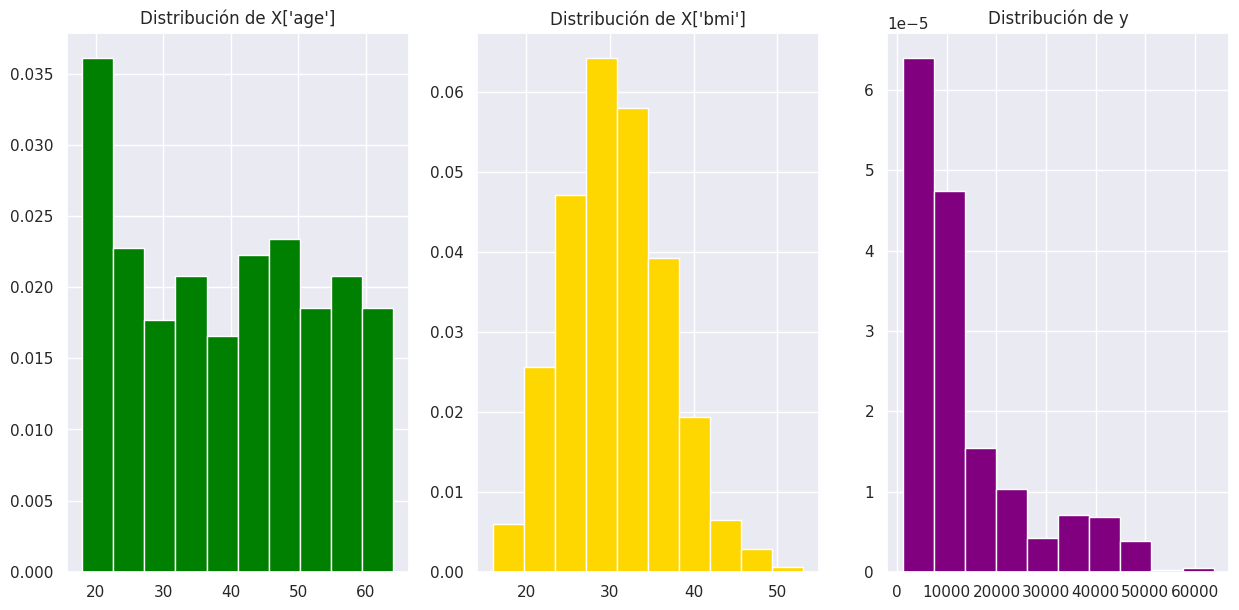

In [54]:
# Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,3,3)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de y");

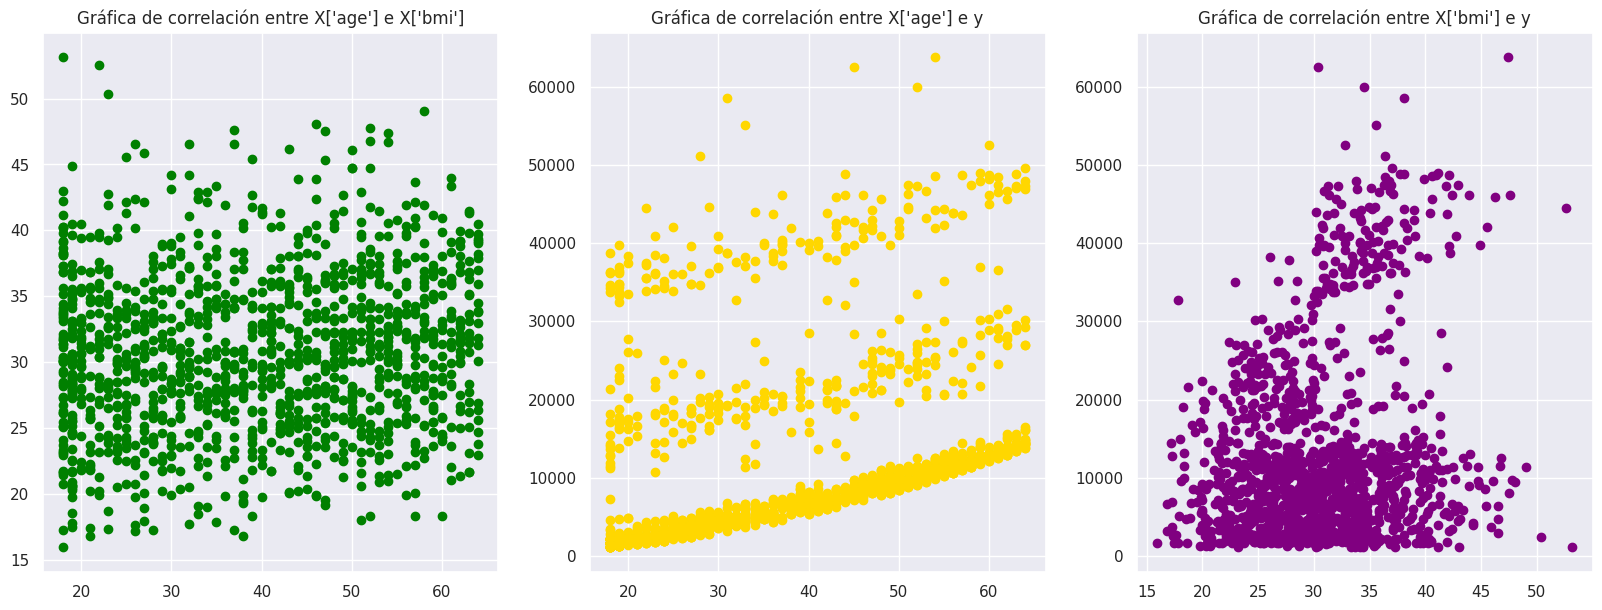

In [55]:
# Vemos si se correlacionan para eso podemos hacer una gráfica de scatter plot o un mapa de calor o un pairplot
# Hacemos primero un scatterplot con un mapa de calor

sns.set()

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['age'] e X['bmi']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],y,color='gold')
plt.title("Gráfica de correlación entre X['age'] e y")
plt.subplot(1,3,3)
plt.scatter(X[:,1],y,color='purple')
plt.title("Gráfica de correlación entre X['bmi'] e y");

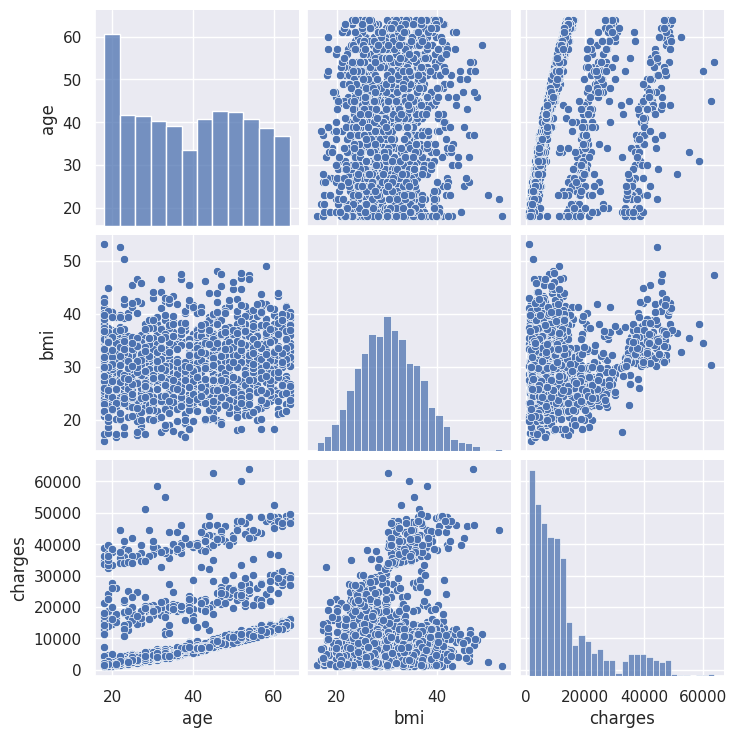

In [56]:
# Luego hacemos un pairplot
sns.pairplot(data[["age","bmi", "charges"]]);

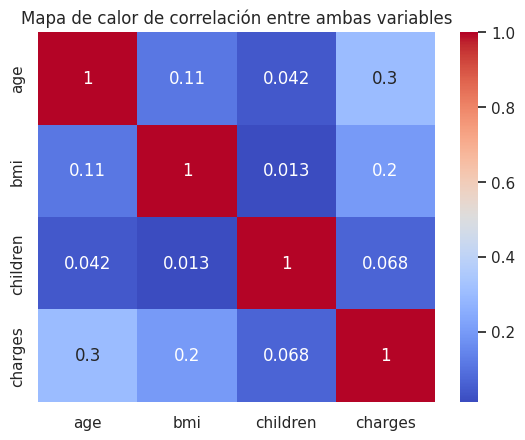

In [57]:
# Finalmente hacemos un mapa de calor
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

## Transformamos los datos

En orden de escalar los datos dentro de un mismo rango de valores, conservando su propia distribución, podemos hacerlo con `StandarScaler` o `MinMaxScale`, ambos de Scikit-Learn

In [58]:
# Utilizamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
X_transformed = scaler.fit_transform(X) # escalamos los datos de entrada X con la función .fit_transform()
print(f"X_transformed: {X_transformed.shape}")

X_transformed: (1338, 2)


In [60]:
# ploteamos como se ven 5 ejemplos de datos normales vs escalados
print(f"X original: {X[:5]}\n")
print(f"X transformed: {X_transformed[:5]}")

X original: [[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

X transformed: [[0.02173913 0.3212268 ]
 [0.         0.47914985]
 [0.2173913  0.45843422]
 [0.32608696 0.18146355]
 [0.30434783 0.34759214]]


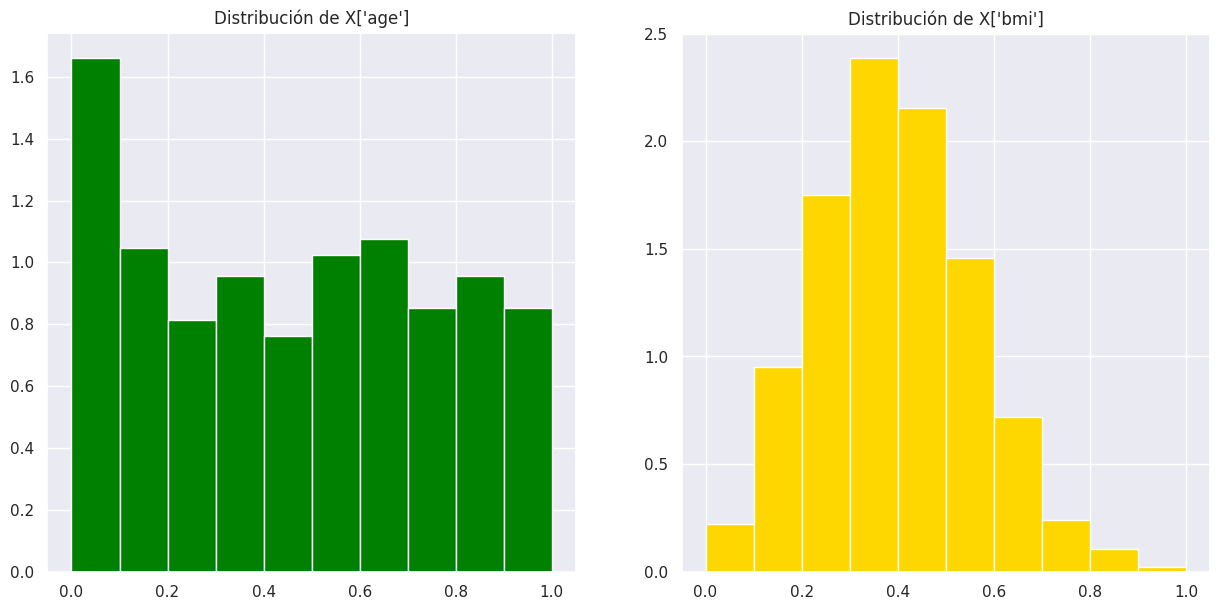

In [61]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(X_transformed[:,0],color='green',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,2,2)
plt.hist(X_transformed[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']");

## Separamos el dataset en entrenamiento y testeo

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [65]:
# Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003, 2) | ytrain shape (1003,)
Xtest shape: (335, 2) | ytest shape (335,)


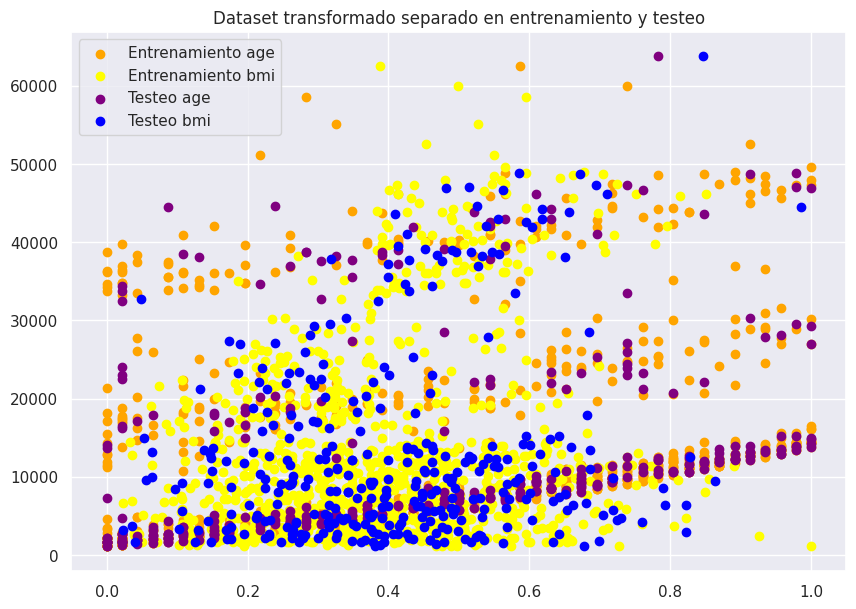

In [66]:
# Vemos gráficamente como queda el dataset transformado separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento age')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento bmi')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo age')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo bmi')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

## Entrenamos el modelo de regresión lineal simple

In [67]:
# Instanciamos el modelo
multilinear_model = LinearRegression()

In [68]:
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [69]:
# Vemos los coeficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [10860.58595323 12307.33053626]
Intercepto que corta al eje de ordenadas: 3431.352752725019


El modelo final quedaria de la siguiente manera:

`y = 10860.58595323 * X0 + 12307.33053626 * X1 + 3431.352752725019`

## Evaluamos el modelo lineal entrenado

In [70]:
# Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.11305926620508677
Valor de métrica R2 con el conjunto de testeo: 0.1288347843390777


In [71]:
# Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain)
y_test_m_pred.shape, y_train_m_pred.shape

((335,), (1003,))

In [72]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) # Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) # Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) # Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) # Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 9188.007558155272
Valor de métrica MAE con el conjunto de entrenamiento: 9000.325577239742

Valor de métrica MSE con el conjunto de testeo: 131451112.26204939
Valor de métrica MSE con el conjunto de entrenamiento: 128686580.36043614


In [73]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Charges maximo: {y.max()} | Charges minimo: {y.min()} | Charges promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Charges maximo: 63770.42801 | Charges minimo: 1121.8739 | Charges promedio: 13270.422265141257 | Varianza de los datos de entrada X: 135.45536818225267


In [74]:
print(f"Entonces el error en testeo es de una proporcion de {(test_mae/y.mean())*100:.2f}%")

Entonces el error en testeo es de una proporcion de 69.24%


In [75]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] # creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 12857.22 --> diferencia = -3762.15 --> error: -41.36%
5272.1758 vs 12336.54 --> diferencia = -7064.37 --> error: -133.99%
29330.98315 vs 17909.31 --> diferencia = 11421.68 --> error: 38.94%
9301.89355 vs 13282.05 --> diferencia = -3980.15 --> error: -42.79%
33750.2918 vs 8951.96 --> diferencia = 24798.34 --> error: 73.47%
4536.259 vs 16129.03 --> diferencia = -11592.77 --> error: -255.54%
2117.33885 vs 5837.87 --> diferencia = -3720.53 --> error: -175.69%
14210.53595 vs 21558.13 --> diferencia = -7347.60 --> error: -51.70%
3732.6251 vs 6232.72 --> diferencia = -2500.10 --> error: -66.98%
10264.4421 vs 14965.46 --> diferencia = -4701.02 --> error: -45.80%
18259.216 vs 9059.11 --> diferencia = 9200.10 --> error: 50.39%
7256.7231 vs 13705.77 --> diferencia = -6449.05 --> error: -88.87%
3947.4131 vs 10541.47 --> diferencia = -6594.06 --> error: -167.05%
46151.1245 vs 18780.12 --> diferencia = 27371.01 --> error: 59.31%
48673.5588 vs 21612.03 --> diferencia = 27061.53 --> erro

In [76]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 120.63%


El valor de error promedio es un poco alto, sin embargo, considerando el conjunto de datos de la variable `charges`, podriamos concluir que es un valor normal para esta variable.

# Support Vector Machines


In [42]:
# Mostramos nuevamente los datos con los que trabajaremos
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
# Definimos las variables con el dataset correspondiente, no sin antes dropear las columnas que no necesitamos
X = insurance.drop(columns=['charges', 'sex', 'smoker', 'region'])
y = insurance['charges']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
from sklearn.svm import SVR # importamos el modelo de support vector regressor (que usa SVM) para hacer regresiones
svr = SVR(kernel='linear',C=6.5,epsilon=0.5,degree=1)
svr.fit(Xtrain, ytrain)

SVR(C=6.5, degree=1, epsilon=0.5, kernel='linear')

In [80]:
# Vemos los mejores parámetros de SVM
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Evaluamos SVM

In [81]:
# Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: -0.15394802272144292
Valor de métrica R2 con el conjunto de testeo: -0.1394541428804681


In [82]:
# Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain)
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [83]:
# Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) # Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) # Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) # Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) # Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 6650.170466881568
Valor de métrica MAE con el conjunto de entrenamiento: 6591.598542473759

Valor de métrica MSE con el conjunto de testeo: 171933534.26032165
Valor de métrica MSE con el conjunto de entrenamiento: 167426773.0633357


In [84]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] # creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 9205.65 --> diferencia = -110.59 --> error: -1.21%
5272.1758 vs 6047.81 --> diferencia = -775.63 --> error: -14.70%
29330.98315 vs 13512.56 --> diferencia = 15818.42 --> error: 53.93%
9301.89355 vs 9848.71 --> diferencia = -546.82 --> error: -5.87%
33750.2918 vs 1515.64 --> diferencia = 32234.65 --> error: 95.51%
4536.259 vs 5878.32 --> diferencia = -1342.06 --> error: -29.58%
2117.33885 vs 1525.66 --> diferencia = 591.68 --> error: 27.91%
14210.53595 vs 13500.82 --> diferencia = 709.71 --> error: 4.99%
3732.6251 vs 3929.54 --> diferencia = -196.91 --> error: -5.25%
10264.4421 vs 10645.01 --> diferencia = -380.57 --> error: -3.70%
18259.216 vs 5586.48 --> diferencia = 12672.73 --> error: 69.40%
7256.7231 vs 8133.97 --> diferencia = -877.25 --> error: -12.09%
3947.4131 vs 4560.10 --> diferencia = -612.69 --> error: -15.50%
46151.1245 vs 9831.03 --> diferencia = 36320.10 --> error: 78.70%
48673.5588 vs 12431.70 --> diferencia = 36241.86 --> error: 74.46%
44202.6536 vs 9723.

In [85]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 28.69%


Como podemos apreciar, se obtuvo un valor de error promedio mas coherente con respecto al analisis de regresión lineal múltiple.

## Decision Tree Regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [87]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Evaluamos DTR

In [88]:
# Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {dt.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {dt.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.9871751526392429
Valor de métrica R2 con el conjunto de testeo: -1.0184338978906986


In [89]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_dt_pred = dt.predict(Xtest)
y_train_dt_pred = dt.predict(Xtrain)
y_test_dt_pred.shape, y_train_dt_pred.shape

((335,), (1003,))

In [90]:
# Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_dt_pred) # Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_dt_pred) # Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_dt_pred) # Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_dt_pred) # Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 10855.805870674627
Valor de métrica MAE con el conjunto de entrenamiento: 120.90105169491525

Valor de métrica MSE con el conjunto de testeo: 304563791.2710543
Valor de métrica MSE con el conjunto de entrenamiento: 1860762.1542410834


In [91]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] # creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_dt_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 8604.48 --> diferencia = 490.58 --> error: 5.39%
5272.1758 vs 33307.55 --> diferencia = -28035.37 --> error: -531.75%
29330.98315 vs 14394.56 --> diferencia = 14936.43 --> error: 50.92%
9301.89355 vs 9500.57 --> diferencia = -198.68 --> error: -2.13%
33750.2918 vs 2261.57 --> diferencia = 31488.72 --> error: 93.30%
4536.259 vs 3994.18 --> diferencia = 542.08 --> error: 11.95%
2117.33885 vs 1628.47 --> diferencia = 488.87 --> error: 23.05%
14210.53595 vs 14410.93 --> diferencia = -200.40 --> error: -1.41%
3732.6251 vs 3260.20 --> diferencia = 472.43 --> error: 12.65%
10264.4421 vs 24915.22 --> diferencia = -14650.78 --> error: -142.73%
18259.216 vs 19362.00 --> diferencia = -1102.78 --> error: -6.04%
7256.7231 vs 39597.41 --> diferencia = -32340.68 --> error: -445.66%
3947.4131 vs 4562.84 --> diferencia = -615.43 --> error: -15.58%
46151.1245 vs 8944.12 --> diferencia = 37207.01 --> error: 80.62%
48673.5588 vs 48173.36 --> diferencia = 500.20 --> error: 1.03%
44202.6536 vs

In [92]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 130.17%


En Decision Tree Regressor, el valor de error promedio da un valor incluso mas alto que en Regresión Lineal Múltiple, sin embargo, nuevamente consideraremos que es un valor normal respecto del conjunto de datos de la variable `charges`.

## Evaluamos gráficamente los modelos

In [93]:
# Definimos una funcion para hacer un resumen de las metricas del modelo y generar una visualizacion de las predicciones y sus desvios:
def model_report(model, y_train_pred, y_test_pred, ytrain = ytrain, ytest = ytest):

    plt.plot(ytrain, ytrain, '-.',c='grey')
    plt.scatter(ytrain, y_train_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()
    plt.plot(ytest, ytest, '-.',c='grey')
    plt.scatter(ytest, y_test_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('TESTEO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()

In [94]:
y_test_m_pred.shape,ytest.shape

((335,), (335,))

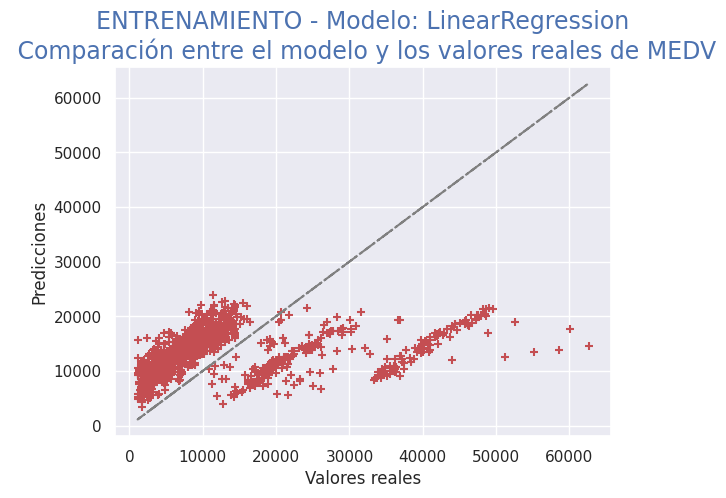

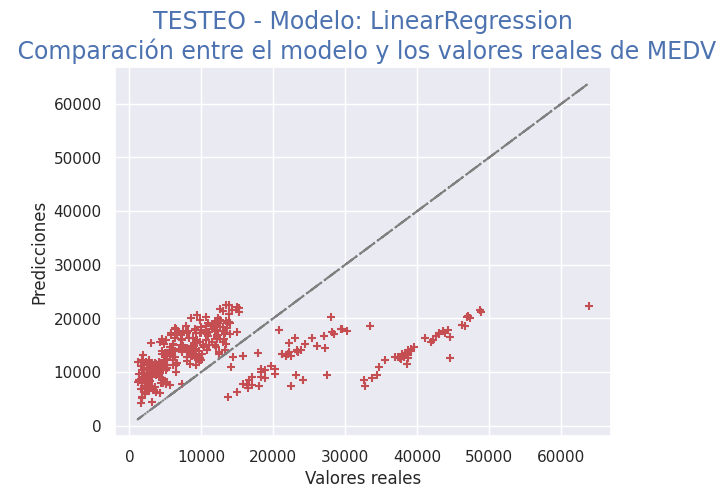

In [95]:
# Aplicamos el reporte al modelo de regresion lineal multivariante
model_report(model = multilinear_model,
             y_train_pred = y_train_m_pred,
             y_test_pred = y_test_m_pred)